In [1]:
import pandas as pd
import numpy as np

In [2]:
installs_dtypes = {'application_id': 'category', 'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)
installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas
installs.drop('attributed', axis = 1, inplace = True) #son todas false
installs.drop('click_hash', axis = 1, inplace = True) #son todas NaN

In [3]:
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}

clicks = pd.read_csv('clicks.csv', dtype = clicks_dtypes)
clicks["created"] =  pd.to_datetime(clicks["created"], errors = "coerce") #parseo de fechas
clicks.drop('action_id', axis = 1, inplace = True) #todos NaN
clicks.drop('wifi_connection', axis = 1, inplace = True) #todos False

In [4]:
events_dtypes = {'event_id': 'category', 'ref_type': 'category', 'ref_hash': 'category', 'application_id': 'category',
                   'attributed': 'category', 'device_countrycode': 'category', 'device_os_version': 'category',
                   'device_brand' : 'category', 'device_model' : 'category', 'device_city': 'category', 'session_user_agent': 'category', 'user_agent': 'category', 'carrier': 'category',
                   'kind': 'category', 'device_os' : 'category', 'wifi': 'category', 'connection_type': 'category',
                   'device_language': 'category'}

events = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

In [ ]:
auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}

auctions = pd.read_csv('auctions.csv', dtype = auctions_dtypes)
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")
auctions.drop('auction_type_id', axis = 1, inplace = True)  #todas Nan

# Analisis de user agent

In [74]:
def clasificar_user_agent(serie_user_agent, serie_session_user_agent):
    nueva_serie = []
    lista_session = serie_session_user_agent.tolist()
    for indice,user_agent in enumerate(serie_user_agent.tolist()):
        if pd.isna(user_agent):
            session = lista_session[indice]
            if pd.isna(session):
                nueva_serie.append("Unknow")
            elif "Android" in session:
                nueva_serie.append("Android")
            elif "iPhone" in session:
                nueva_serie.append("Iphone")
            else:
                nueva_serie.append("Unknow")
        elif "Android" in user_agent:
            nueva_serie.append("Android")
        elif ("Darwin" in user_agent) or ("CFNetwork" in user_agent):
            nueva_serie.append("Iphone")
        else:
            nueva_serie.append("Error")
    return nueva_serie

installs["os"] = clasificar_user_agent(installs["user_agent"], installs["session_user_agent"])
installs["os"].value_counts()

Unknow     1663
Android     958
Iphone      791
Name: os, dtype: int64

In [6]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

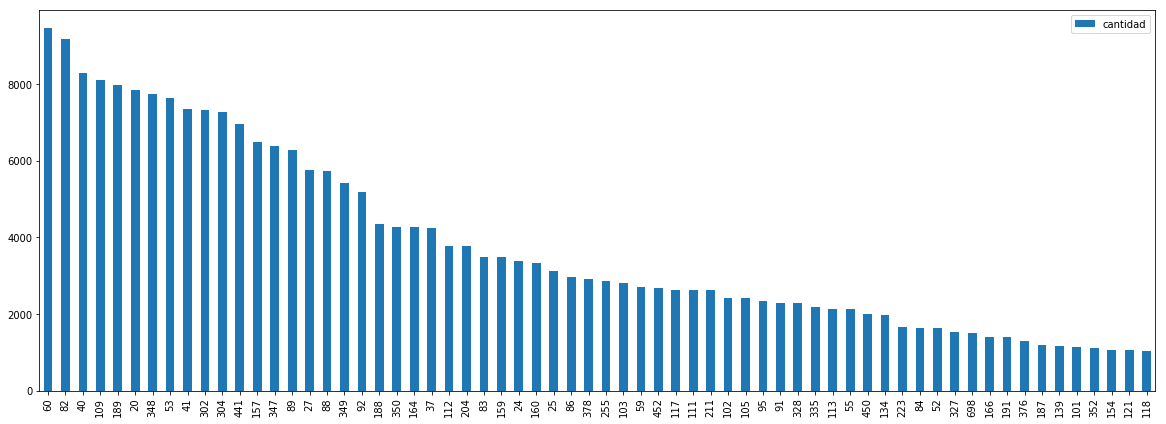

In [40]:
eventos_x_cantidad = pd.DataFrame(events["event_id"].value_counts())
eventos_x_cantidad.rename(columns={'event_id':'cantidad'}, inplace=True)
eventos_x_cantidad["event_id"] = eventos_x_cantidad.index
eventos_x_cantidad = eventos_x_cantidad[(eventos_x_cantidad["cantidad"] < 10000) & (eventos_x_cantidad["cantidad"] > 1000)]
eventos_x_cantidad.plot(kind="bar", figsize=(20,7))

In [53]:
events["session_user_agent"].value_counts()

3.819516403548394e+18     1461049
7.164321382499455e+18      649962
1.1609515031332844e+18      78232
2.394269162455642e+18       11210
3.8316191210585426e+18      10838
6.59386819643465e+18         9911
2.4958048761062277e+18       7391
7.512089018183668e+18        6995
7.738334399785623e+18        6770
7.72027024220892e+18         6626
5.254247406123229e+18        6450
4.3922650149309645e+18       5998
9.177081431590678e+18        5615
1.2440622242452342e+18       5525
3.5907478428344975e+18       5448
6.840860440298272e+18        5055
1.637986409760501e+18        4872
5.407281900521064e+18        4619
5.51960942967474e+18         3914
4.525726530677256e+18        3724
4.47207748927856e+18         3657
4.185911564152913e+18        3436
6.10522694935703e+18         3412
8.089178157941562e+18        3326
2.9554935318608517e+18       3267
4.2591543230719636e+18       3194
4.455209013830674e+18        3008
6.36894744937942e+18         3004
6.091499354492879e+18        2755
8.227344568093

In [56]:
installs.loc[pd.isna(installs["user_agent"])]["session_user_agent"].value_counts()

adjust.com                                                                                                                                                                                                                                                                    1592
HasOffers Mobile AppTracking v1.0                                                                                                                                                                                                                                               22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1                                                                                                                                       10
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/72.0.3626.101 Mobile/15E148 Safari/605.1                                 

In [62]:
installs

2       NaN
4       NaN
6       NaN
8       NaN
940     NaN
944     NaN
945     NaN
946     NaN
947     NaN
2157    NaN
2359    NaN
2362    NaN
2364    NaN
2368    NaN
2372    NaN
2373    NaN
2473    NaN
2475    NaN
2478    NaN
2482    NaN
2486    NaN
2489    NaN
Name: user_agent, dtype: category
Categories (334, object): [Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-I826..., Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-I855..., Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-N800..., Dalvik/1.6.0 (Linux; U; Android 4.1.2; LG-E475..., ..., PeixeUrbano/2 CFNetwork/894 Darwin/17.4.0, PeixeUrbano/2 CFNetwork/902.2 Darwin/17.7.0, PeixeUrbano/2 CFNetwork/976 Darwin/18.2.0, takealot/201812181130 CFNetwork/976 Darwin/18.2.0]